# Spiral Arms, Gas, and Young Stars in NIHAO


Both young stars and gas follow spiral arm overdensities. *Up to which stellar age are they spatially and chemically coherent?*  

This script traces the face on position and iron abundance [Fe/H] of some of the youngest stars in a NIHAO simulation. It also overlays them on top of the gas density. To do so, it reads in the lite files of galaxy simulations from NIHAO and then performs.  

*How much does this picture deviate from a simple toy model of a linear Radius-[Fe/H] gradient and what can we learn about the real Milky Way?*


#### Github Repository

https://www.github.com/svenbuder/preparing_NIHAO

#### Author:
Sven Buder (ANU, sven.buder@anu.edu.au)

#### Initial Data - NIHAO-UHD simulations:  
Buck (2020): https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.5435B  
Buck et al. (2020b): https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.3461B  
Buck et al. (2021): https://ui.adsabs.harvard.edu/abs/2021MNRAS.508.3365B  
Buck et al. (2023): https://ui.adsabs.harvard.edu/abs/2023MNRAS.523.1565B  
Buder, Mijnarends, and Buck (2024): https://ui.adsabs.harvard.edu/abs/2024arXiv240413835B  

#### Milky Way Spiral Arms and Young Stars:
Hawkins (2023): https://ui.adsabs.harvard.edu/abs/2023MNRAS.525.3318H  
Hackshaw et al. (2024): https://ui.adsabs.harvard.edu/abs/2024arXiv240518120H

In [10]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# general packages
import numpy as np
from astropy.table import Table
import os
from sklearn.linear_model import LinearRegression
from scipy.stats import binned_statistic_2d
import astropy.units as u

# pynbody
import pynbody as pb
from pynbody.snapshot.tipsy import TipsySnap

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20

panels = [
    'a)','b)','c)',
    'd)','e)','f)',
    'g)','h)','i)',
    'j)','k)','l)',
    'm)','n)','o)',
    'q)','r)','s)',
    't)','u)','v)',
    'w)','x)','y)',
    'z)','aa)','ab)',
    'ac)','ad)','ae)'
]

In [2]:
simulation_name = 'NIHAO_g8.26e11_extensive'
# simulation_name = 'NIHAO_g8.26e11_pilot'

simulation_lite_stars = Table.read('../../NIHAO_prepared/'+simulation_name+'_stars.fits')
simulation_lite_gas   = Table.read('../../NIHAO_prepared/'+simulation_name+'_gas.fits')

In [3]:
# Calculate the galactocentric radius R
simulation_lite_stars['R'] = np.sqrt(simulation_lite_stars['x']**2 + simulation_lite_stars['y']**2)

simulation_lite_gas['R']    = np.sqrt(  simulation_lite_gas['x']**2 +   simulation_lite_gas['y']**2)
simulation_lite_gas['Fe_H'] = np.log10(simulation_lite_gas['metallicity_z'] / 0.0152)

# Youngest stars tracing spiral arms?

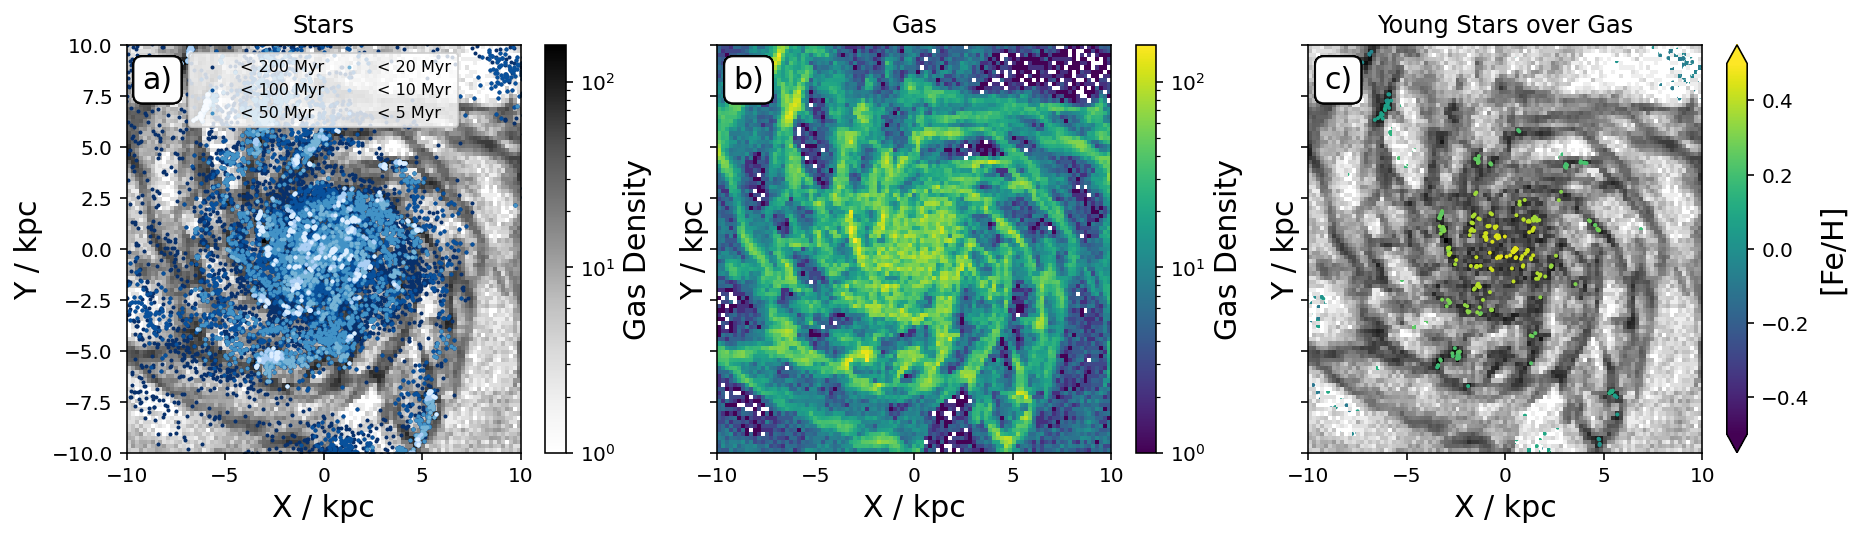

In [4]:
f, gs = plt.subplots(1,3,figsize=(15,3.75),sharex=True,sharey=True)

blues = ['#08306b', '#08519c', '#4292c6',  '#77b4d6',  '#abcff5', '#ddeeff']

for age_index, maximum_age in enumerate([200,100,50, 20, 10, 5]): # Myr

    youngest_stars = (
        (simulation_lite_stars['age'] < maximum_age/1000.) &
        (np.sqrt(
            simulation_lite_stars['x']**2 + simulation_lite_stars['y']**2
        ) < 100) # galactocentric radius within 100 kpc
    )

    spatial_extends = [30,10] # kpc
    spatial_extends = [10] # kpc
    
    for spatial_extend in spatial_extends:

        ax = gs[0]
        ax.set_title('Stars')# < '+str(maximum_age)+' Gyr')
        ax.text(0.04,0.95,panels[0],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('X / kpc')
        ax.set_ylabel('Y / kpc')
        
        h = ax.hist2d(
            simulation_lite_gas['x'],
            simulation_lite_gas['y'],
            bins = (
                np.linspace(-spatial_extend, spatial_extend,100),
                np.linspace(-spatial_extend, spatial_extend,100)
            ),
            cmin = 1, cmap = 'Greys', zorder=0,
            norm = LogNorm()
        );
        if age_index == 0:
            cbar = plt.colorbar(h[-1], ax=ax)
            cbar.set_label('Gas Density')
        s = ax.scatter(
            simulation_lite_stars['x'][youngest_stars],
            simulation_lite_stars['y'][youngest_stars],
            label = '< '+str(maximum_age)+' Myr',
            s = 1, c = blues[age_index], zorder=1
        );
        ax.legend(ncol=2, fontsize=8, columnspacing = 0.5, markerscale = 1, loc='upper center')

        ax = gs[1]
        ax.set_title('Gas')
        ax.text(0.04,0.95,panels[1],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('X / kpc')
        ax.set_ylabel('Y / kpc')

        h = ax.hist2d(
            simulation_lite_gas['x'],
            simulation_lite_gas['y'],
            bins = (
                np.linspace(-spatial_extend, spatial_extend,100),
                np.linspace(-spatial_extend, spatial_extend,100)
            ),
            cmin = 1,
            norm = LogNorm()
        );
        if age_index == 0:
            cbar = plt.colorbar(h[-1], ax=ax)
            cbar.set_label('Gas Density')
        
        ax = gs[2]
        ax.set_title('Young Stars over Gas')
        ax.text(0.04,0.95,panels[2],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('X / kpc')
        ax.set_ylabel('Y / kpc')

        h = ax.hist2d(
            simulation_lite_gas['x'],
            simulation_lite_gas['y'],
            bins = (
                np.linspace(-spatial_extend, spatial_extend,100),
                np.linspace(-spatial_extend, spatial_extend,100)
            ),
            cmin = 1, cmap = 'Greys',
            norm = LogNorm()
        );
        s = ax.scatter(
            simulation_lite_stars['x'][youngest_stars],
            simulation_lite_stars['y'][youngest_stars],
            c = simulation_lite_stars['Fe_H'][youngest_stars],
            s = 1,
            vmin = -0.5, vmax = 0.5
        );
        if age_index == 0:
            cbar = plt.colorbar(s, ax=ax, extend='both')
            cbar.set_label('[Fe/H]')

        plt.savefig(simulation_name+'_young_stars_i'+str(age_index)+'.png',dpi=300,bbox_inches='tight')

plt.show()
plt.close()

In [5]:
# make a GIF!
os.system('convert -delay 180 '+simulation_name+'_young_stars_*.png '+simulation_name+'_young_stars.gif');

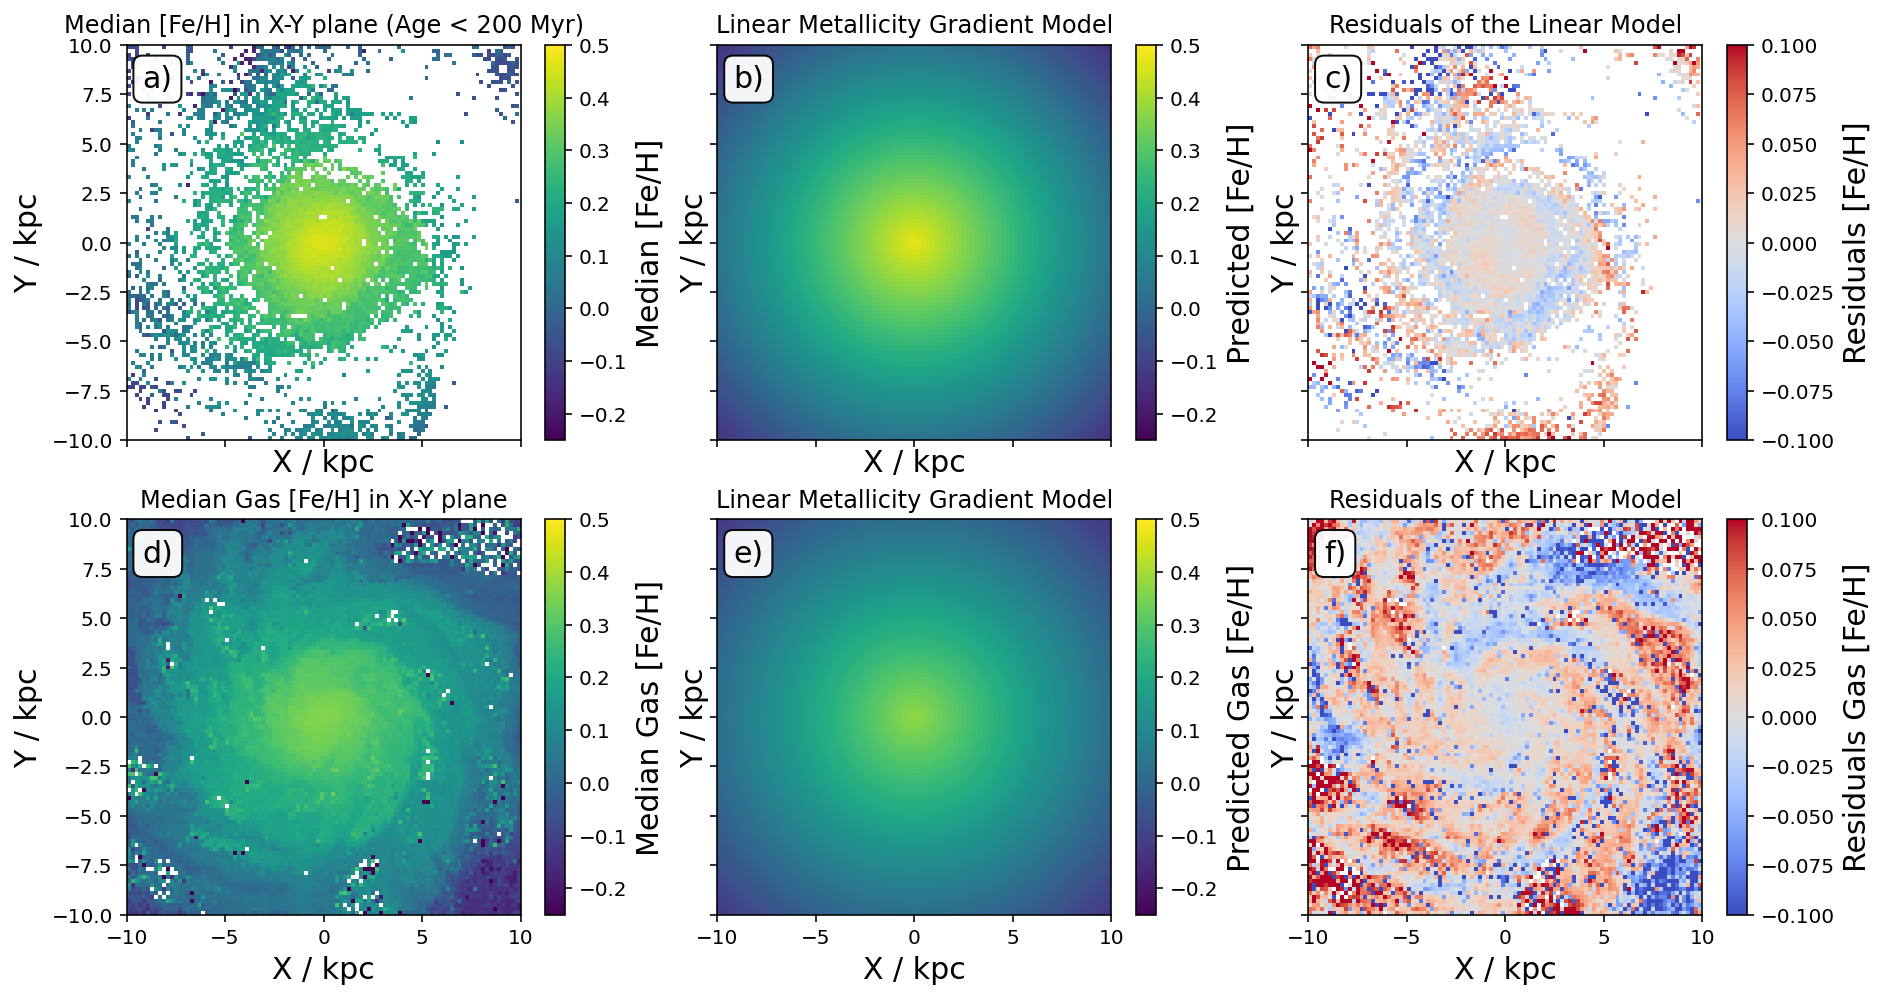

In [6]:
f, gs = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)

maximum_age = 200 # Myr

spatial_extend = 10 # kpc


select_young_in_spatial_extend = (
    (simulation_lite_stars['age'] < maximum_age/1000.) &
    (np.abs(simulation_lite_stars['x']) < spatial_extend) &
    (np.abs(simulation_lite_stars['y']) < spatial_extend)
)

simulation_young = Table()
for key in ['x','y','R','Fe_H']:
    simulation_young[key] = simulation_lite_stars[key][select_young_in_spatial_extend]

select_gas_in_spatial_extend = (
    (np.abs(simulation_lite_gas['x']) < spatial_extend) &
    (np.abs(simulation_lite_gas['y']) < spatial_extend)
)

simulation_gas = Table()
for key in ['x','y','R','Fe_H','metallicity_z']:
    simulation_gas[key] = simulation_lite_gas[key][select_gas_in_spatial_extend]

# Fit a linear regression model
R    = simulation_young['R'].reshape(-1, 1)  # Reshape for sklearn
Fe_H = simulation_young['Fe_H']

model = LinearRegression()
model.fit(R, Fe_H)

# Calculate predicted fe_h and residuals
simulation_young['Fe_H_linear_model'] = model.predict(R)
simulation_young['Fe_H_residuals'] = simulation_young['Fe_H'] - simulation_young['Fe_H_linear_model']

# Define the bins for hist2d
bins = 100

# 2D histogram colored by median fe_h
stat, x_edge, y_edge, _ = binned_statistic_2d(simulation_young['x'], simulation_young['y'], simulation_young['Fe_H'], statistic='median', bins=bins)

# Subpanel 1: 2D histogram of x and y colored by median fe_h
ax = gs[0,0]
ax.cla()
ax.set_title('Median [Fe/H] in X-Y plane (Age < '+str(maximum_age)+' Myr)')
ax.text(0.04,0.95,panels[0],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
ax.set_xlabel('X / kpc')
ax.set_ylabel('Y / kpc')


pcm = ax.pcolormesh(x_edge, y_edge, stat.T, shading='auto', cmap='viridis', vmin = -0.25, vmax = 0.5)
plt.colorbar(pcm, ax=ax, label='Median [Fe/H]')       

# Subpanel 2: Metallic gradient model in x and y

ax = gs[0,1]
ax.cla()
ax.set_title('Linear Metallicity Gradient Model')
ax.text(0.04,0.95,panels[1],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
ax.set_xlabel('X / kpc')
ax.set_ylabel('Y / kpc')

# Calculate predicted fe_h for grid points in x and y
x_grid, y_grid = np.meshgrid(np.linspace(-spatial_extend, spatial_extend, bins),
                             np.linspace(-spatial_extend, spatial_extend, bins))
R_grid = np.sqrt(x_grid**2 + y_grid**2)
fe_h_pred_grid = model.predict(R_grid.reshape(-1, 1)).reshape(R_grid.shape)

pcm = ax.pcolormesh(x_grid, y_grid, fe_h_pred_grid, shading='auto', cmap='viridis', vmin = -0.25, vmax = 0.5)
plt.colorbar(pcm, ax=ax, label='Predicted [Fe/H]')

# Subpanel 3: Residuals
ax = gs[0,2]
ax.cla()
ax.set_title('Residuals of the Linear Model')
ax.text(0.04,0.95,panels[2],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
ax.set_xlabel('X / kpc')
ax.set_ylabel('Y / kpc')

stat_residuals, x_edge, y_edge, _ = binned_statistic_2d(simulation_young['x'], simulation_young['y'], simulation_young['Fe_H_residuals'], statistic='mean', bins=bins)

pcm = ax.pcolormesh(x_edge, y_edge, stat_residuals.T, shading='auto', cmap='coolwarm', vmin=-0.1, vmax=0.1)
plt.colorbar(pcm, ax=ax, label='Residuals [Fe/H]')
ax.set_xlim(-spatial_extend,spatial_extend)
ax.set_ylim(-spatial_extend,spatial_extend)

# Fit a linear regression model
R    = simulation_gas['R'].reshape(-1, 1)  # Reshape for sklearn
Fe_H = simulation_gas['Fe_H']

model = LinearRegression()
model.fit(R, Fe_H)

# Calculate predicted fe_h and residuals
simulation_gas['Fe_H_linear_model'] = model.predict(R)
simulation_gas['Fe_H_residuals'] = simulation_gas['Fe_H'] - simulation_gas['Fe_H_linear_model']

# Define the bins for hist2d
bins = 100

# 2D histogram colored by median fe_h
stat, x_edge, y_edge, _ = binned_statistic_2d(simulation_gas['x'], simulation_gas['y'], simulation_gas['Fe_H'], statistic='median', bins=bins)

# Subpanel 1: 2D histogram of x and y colored by median fe_h
ax = gs[1,0]
ax.cla()
ax.set_title('Median Gas [Fe/H] in X-Y plane')
ax.text(0.04,0.95,panels[3],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
ax.set_xlabel('X / kpc')
ax.set_ylabel('Y / kpc')

pcm = ax.pcolormesh(x_edge, y_edge, stat.T, shading='auto', cmap='viridis', vmin = -0.25, vmax = 0.5)
plt.colorbar(pcm, ax=ax, label='Median Gas [Fe/H]')       

# Subpanel 2: Metallic gradient model in x and y

ax = gs[1,1]
ax.cla()
ax.set_title('Linear Metallicity Gradient Model')
ax.text(0.04,0.95,panels[4],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
ax.set_xlabel('X / kpc')
ax.set_ylabel('Y / kpc')

# Calculate predicted fe_h for grid points in x and y
x_grid, y_grid = np.meshgrid(np.linspace(-spatial_extend, spatial_extend, bins),
                             np.linspace(-spatial_extend, spatial_extend, bins))
R_grid = np.sqrt(x_grid**2 + y_grid**2)
fe_h_pred_grid = model.predict(R_grid.reshape(-1, 1)).reshape(R_grid.shape)

pcm = ax.pcolormesh(x_grid, y_grid, fe_h_pred_grid, shading='auto', cmap='viridis', vmin = -0.25, vmax = 0.5)
plt.colorbar(pcm, ax=ax, label='Predicted Gas [Fe/H]')

# Subpanel 3: Residuals
ax = gs[1,2]
ax.cla()
ax.set_title('Residuals of the Linear Model')
ax.text(0.04,0.95,panels[5],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
ax.set_xlabel('X / kpc')
ax.set_ylabel('Y / kpc')

stat_residuals, x_edge, y_edge, _ = binned_statistic_2d(simulation_gas['x'], simulation_gas['y'], simulation_gas['Fe_H_residuals'], statistic='mean', bins=bins)

pcm = ax.pcolormesh(x_edge, y_edge, stat_residuals.T, shading='auto', cmap='coolwarm', vmin = -0.1, vmax = 0.1)
plt.colorbar(pcm, ax=ax, label='Residuals Gas [Fe/H]')
ax.set_xlim(-spatial_extend,spatial_extend)
ax.set_ylim(-spatial_extend,spatial_extend)

plt.savefig(simulation_name+'_young_stars_vs_gas.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [8]:
# Function to back-track positions
def backtrack_positions(X_kpc, Y_kpc, theta):
    """
    Backtrack the positions of stars in the X-Y plane.
    
    Parameters:
    X_kpc (float or array-like): X positions in kpc.
    Y_kpc (float or array-like): Y positions in kpc.
    theta (float): Angle traveled in radians.
    
    Returns:
    tuple: New X and Y positions after back-tracking.
    """
    X_new = X_kpc * np.cos(theta) + Y_kpc * np.sin(theta)
    Y_new = -X_kpc * np.sin(theta) + Y_kpc * np.cos(theta)
    return X_new, Y_new

The Galaxy has travelled -322.3 deg in -200.0 Myr


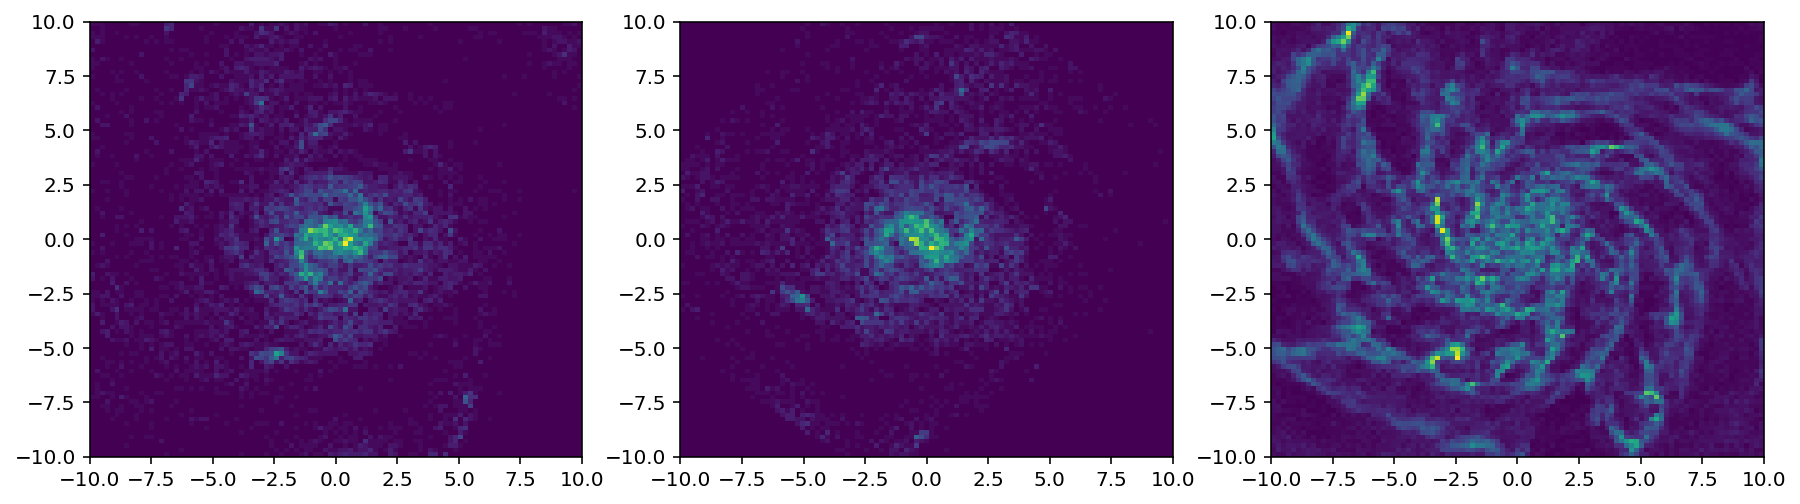

In [42]:
# Given values
v = 220 * u.km / u.s  # Orbital velocity
R = 8 * u.kpc  # Radius
t = -200 * u.Myr  # Time period

# Calculate angular velocity
omega = (v / R).to(1. / u.s) # Angular velocity in rad/s
omega = omega*u.rad

# Calculate the angle traveled in time t
theta = (omega * t).to(u.rad)  # Angle in radians

print('The Galaxy has travelled '+str(np.round(theta.to(u.deg),1))+' in '+str(t))

simulation_young['x_rot'], simulation_young['y_rot'] = backtrack_positions(
    X_kpc = simulation_young['x'],
    Y_kpc = simulation_young['y'],
    theta = theta
)

f, gs = plt.subplots(1,3,figsize=(15,4))

ax = gs[0]
ax.hist2d(
    simulation_young['x'],
    simulation_young['y'],
    bins = np.linspace(-10, 10, 100)
);

ax = gs[1]
ax.hist2d(
    simulation_young['x_rot'],
    simulation_young['y_rot'],
    bins = np.linspace(-10, 10, 100)
);

ax = gs[2]
ax.hist2d(
    simulation_gas['x'],
    simulation_gas['y'],
    bins = np.linspace(-10, 10, 100)
);